<a href="https://colab.research.google.com/github/verenaashraf/House-Prices---Advanced-Regression-Techniques/blob/main/HousePrices_AdvancedRegressionTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
from sklearn import metrics

In [16]:
Data=pd.read_csv("train.csv")

In [17]:
Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
Data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [19]:
Data.shape

(1460, 81)

In [20]:
Data.drop("Id", axis=1,inplace=True)

In [21]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [22]:
Data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
Data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [24]:
Data.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


<Axes: xlabel='SalePrice', ylabel='Count'>

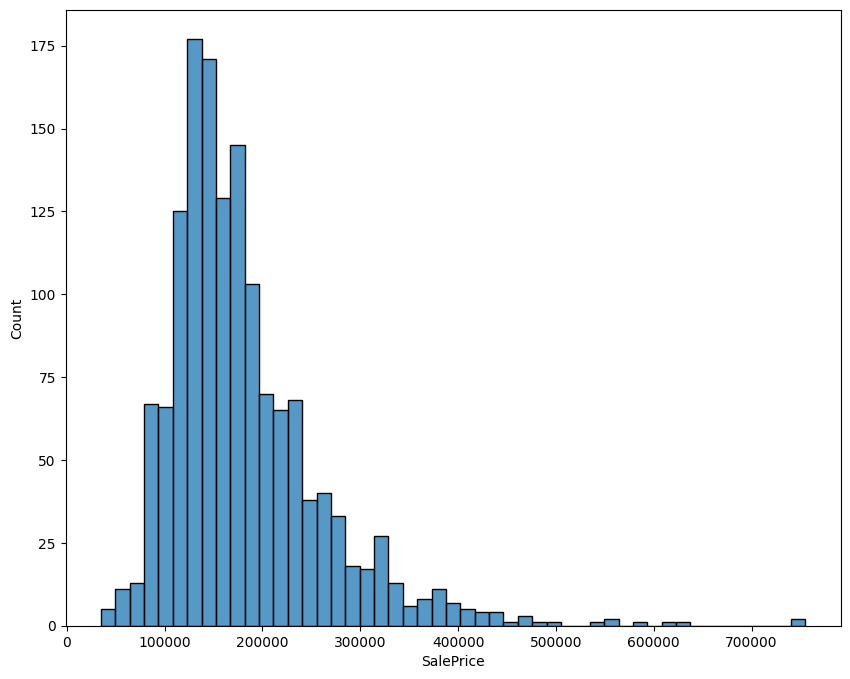

In [25]:
#to print histogram of data
plt.figure(figsize=(10,8))
sns.histplot(Data['SalePrice'])

In [26]:
def remove_outliers(df, column):
    data=df[column]
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    iqr=q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_cleaned = df[(data >= lower_bound) & (data <= upper_bound)].copy()
    return df_cleaned

Data = remove_outliers(Data, 'SalePrice')
print(Data.shape)

(1399, 80)


<Axes: xlabel='SalePrice', ylabel='Count'>

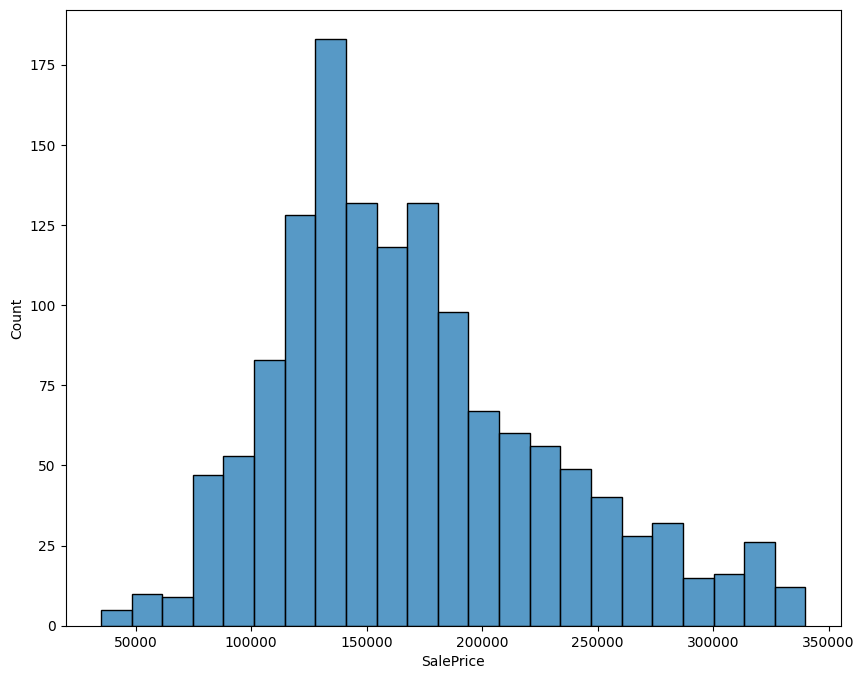

In [27]:
plt.figure(figsize=(10,8))
sns.histplot(Data['SalePrice'])

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

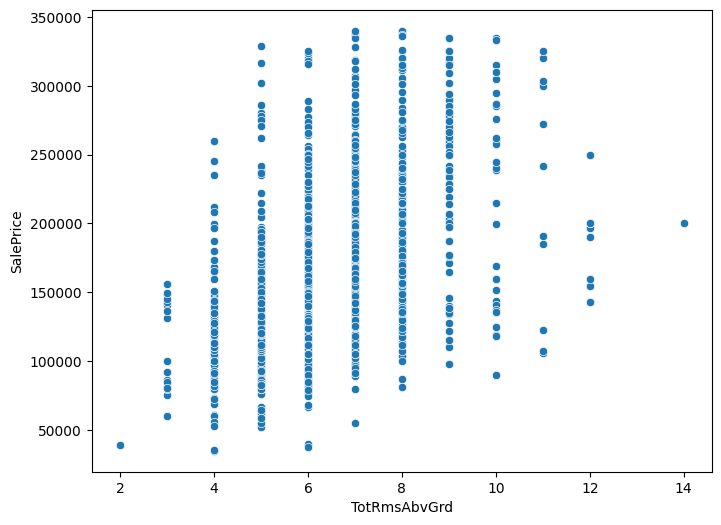

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=Data['TotRmsAbvGrd'], y=Data["SalePrice"])

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

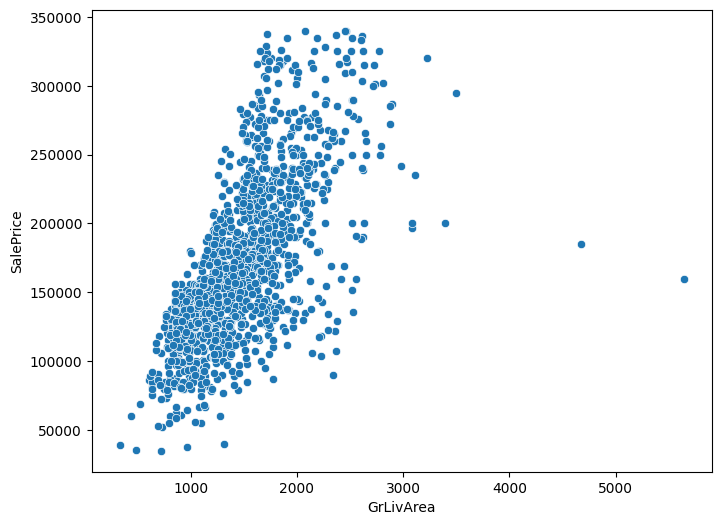

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=Data["GrLivArea"], y=Data["SalePrice"])

<Axes: xlabel='KitchenAbvGr', ylabel='SalePrice'>

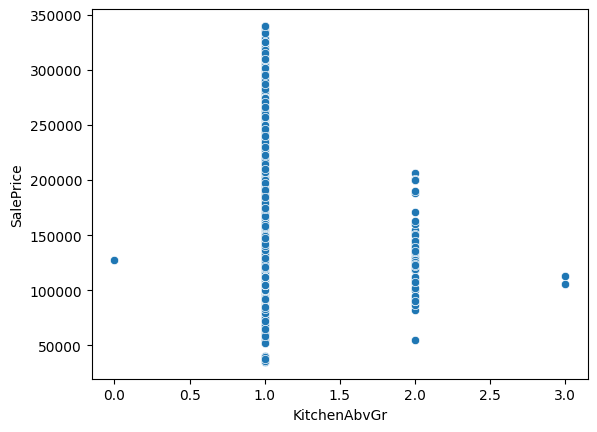

In [30]:
plt.figure()
sns.scatterplot(x=Data['KitchenAbvGr'], y=Data["SalePrice"])

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

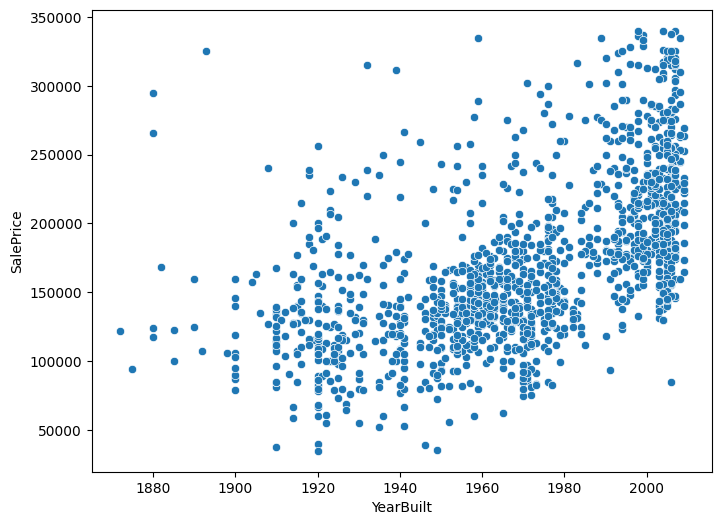

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=Data['YearBuilt'], y=Data["SalePrice"])

<Axes: xlabel='YearBuilt'>

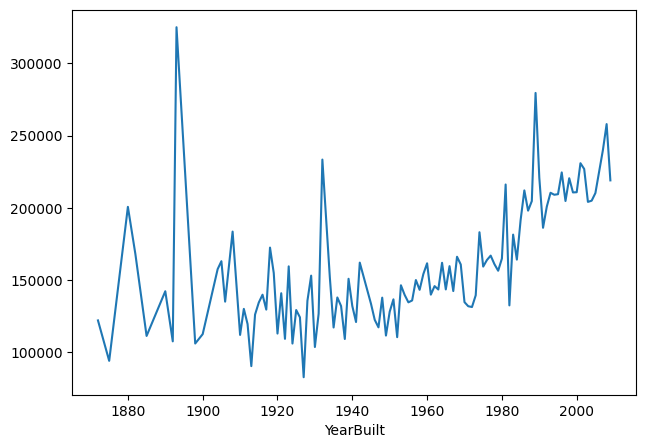

In [32]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,2)
Data.groupby('YearBuilt')['SalePrice'].mean().plot()

<Axes: >

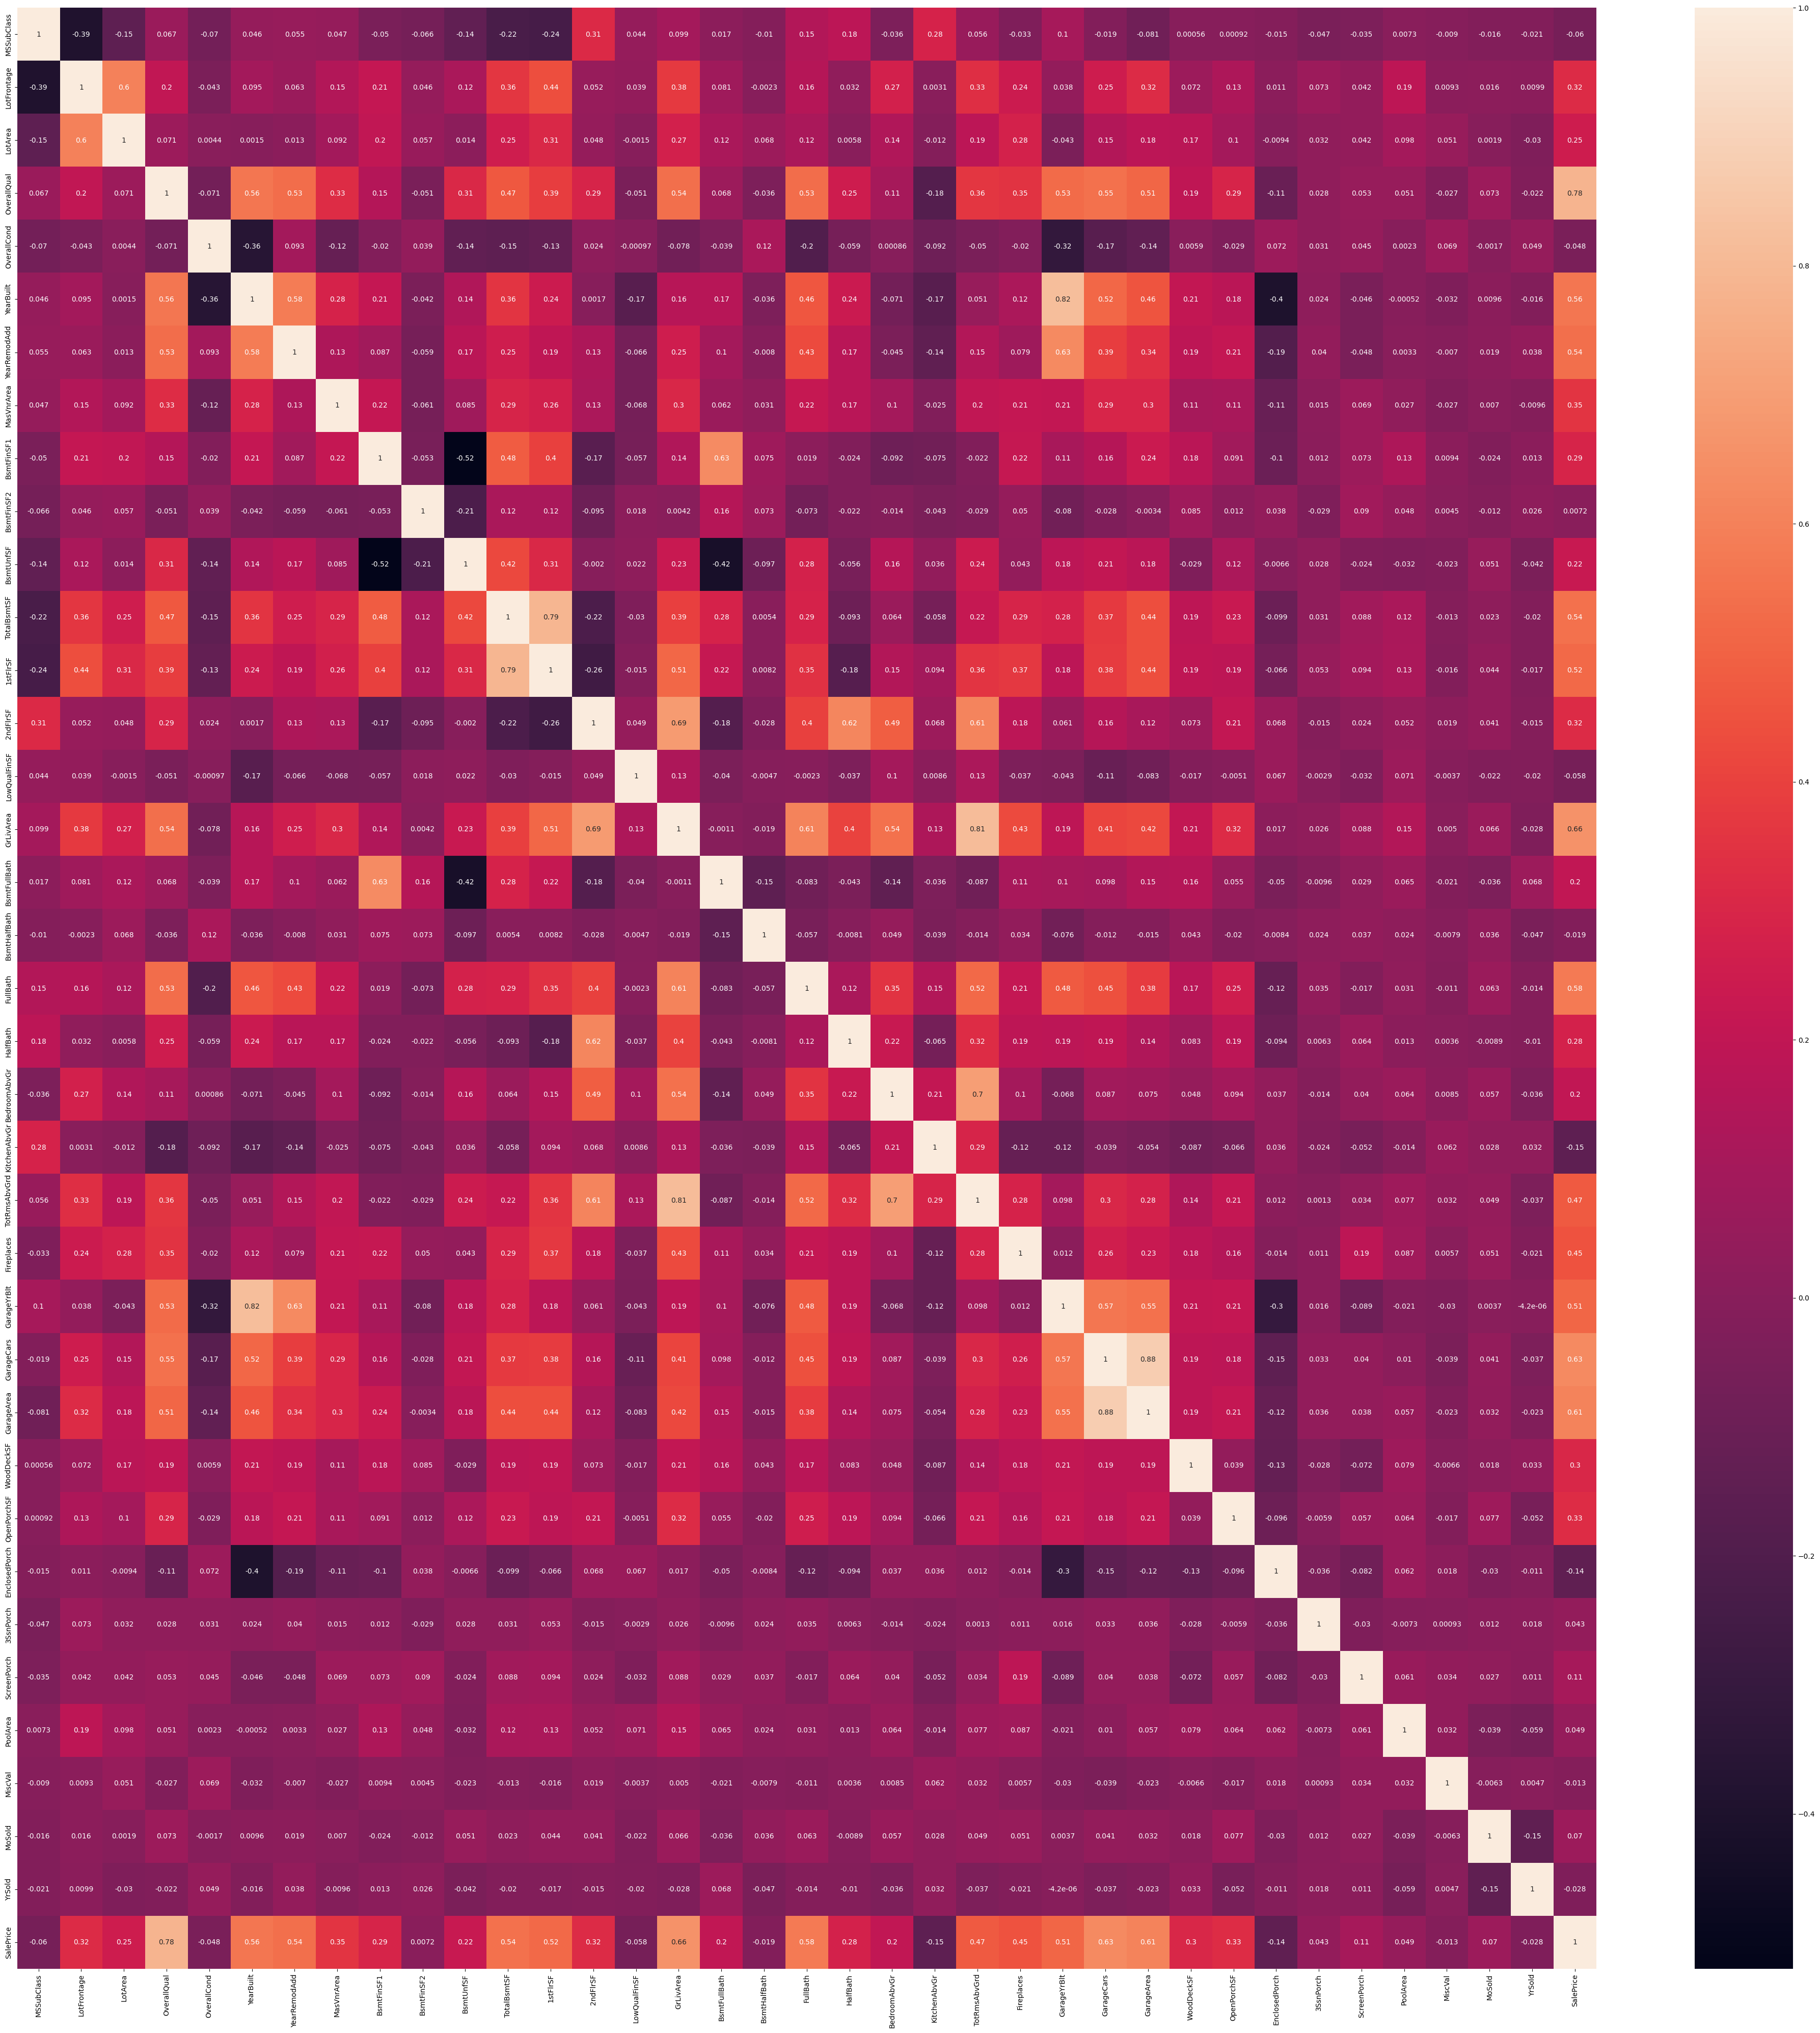

In [33]:
plt.figure(figsize=(50,50))
sns.heatmap(Data.select_dtypes(include=np.number).corr(),annot=True)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

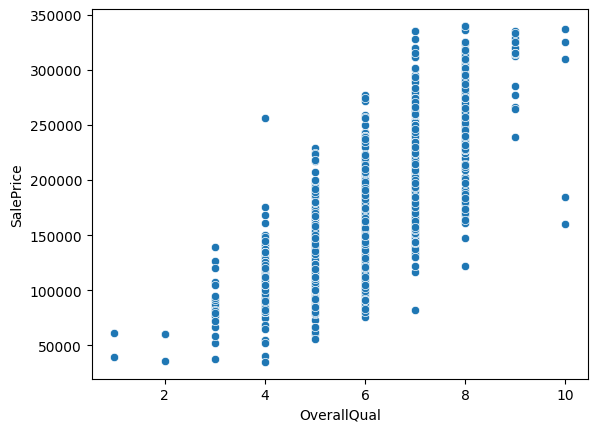

In [34]:
plt.figure()
sns.scatterplot(x=Data['OverallQual'], y=Data["SalePrice"])

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

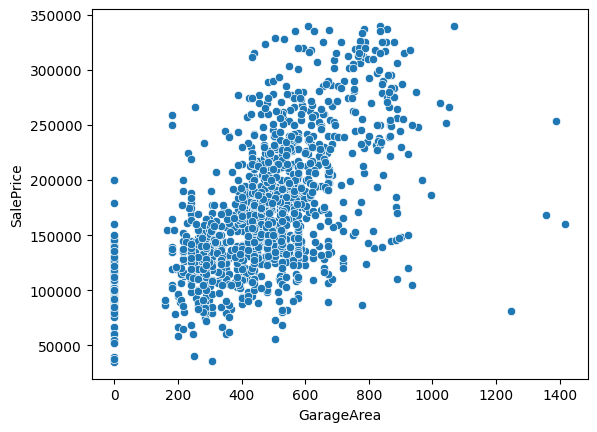

In [35]:
plt.figure()
sns.scatterplot(x=Data['GarageArea'], y=Data["SalePrice"])

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

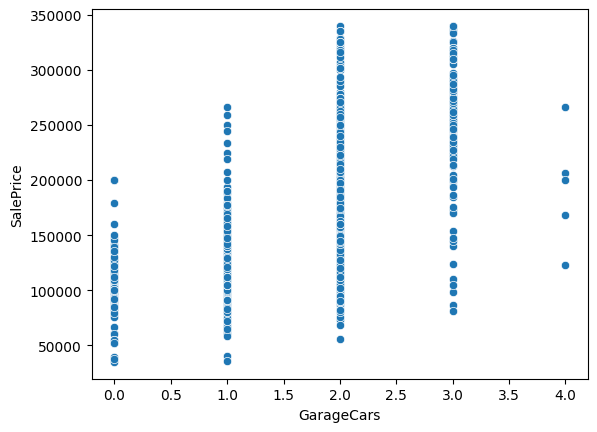

In [36]:
plt.figure()
sns.scatterplot(x=Data['GarageCars'], y=Data["SalePrice"])

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

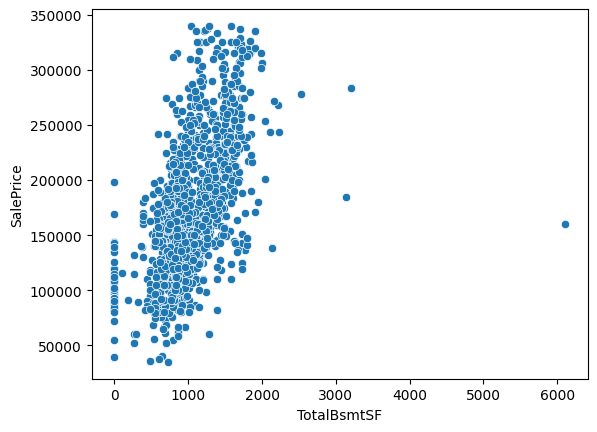

In [37]:
plt.figure()
sns.scatterplot(x=Data['TotalBsmtSF'], y=Data["SalePrice"])

so the most correlated features is

GrLivArea

OverallQual

GarageCars

TotalBsmtSF



**Simple Linear Regression with one variable**

In [59]:
Data_cleaned = Data.dropna(subset=['GrLivArea', 'SalePrice']).copy()

x = Data_cleaned[["GrLivArea"]]
y = Data_cleaned["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [60]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [61]:
print(LR.intercept_)
print(LR.coef_)

42783.761251566524
[86.58831342]


In [65]:
y_pred_LR = LR.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_LR})
df1 = df.head(10)
df1

,Actual,Predicted
341,82000,115604.532835
712,189000,149114.210128
1387,136000,261505.840943
1051,200141,156733.981708
152,190000,215354.269891
703,140000,199681.785163
262,151000,147728.797113
1200,116050,117596.064044
1028,105000,161929.280513
145,130000,190763.188881


In [67]:
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_LR)))
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_LR)))
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR))))

Mean Absolute Error: 32284.61
Mean Squared Error:2115088723.33
Root Mean Squared Error:45990.09


**Multiple linear Regression**

In [44]:
numeric_data = Data.select_dtypes(include=[np.number])
X = numeric_data.drop("SalePrice", axis=1)
y = numeric_data["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
MLR = LinearRegression()
MLR.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = MLR.predict(X_test)

df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df.head(10)

,Actual,Predicted
703,140000,139797.757843
656,145500,137704.262390
119,163990,186699.408606
502,140000,157911.164499
243,120000,130256.213935
763,337000,278881.081471
216,210000,216415.074355
913,145000,152582.150540
985,125000,91976.249071
503,289000,245696.626436


In [49]:
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 16299.77
Mean Squared Error:461214632.70
Root Mean Squared Error:21475.91


**Polynomial Regression (degree=2)**

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_lr_model = LinearRegression()
poly_lr_model.fit(X_train_poly, y_train)

y_pred_poly_lr = poly_lr_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly_lr)
r2_poly = r2_score(y_test, y_pred_poly_lr)

print(f"Polynomial Regression Mean Squared Error (MSE): {mse_poly}")
print(f"Polynomial Regression R-squared (R2) Score: {r2_poly}")

Polynomial Regression Mean Squared Error (MSE): 23931692586.489872
Polynomial Regression R-squared (R2) Score: -6.523755562017316


lasso regression

In [57]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = lasso_model.score(X_test, y_test)

print(f"Lasso Regression Mean Squared Error (MSE): {mse_lasso}")
print(f"Lasso Regression R-squared (R2) Score: {r2_lasso}")

Lasso Regression Mean Squared Error (MSE): 461224380.1095972
Lasso Regression R-squared (R2) Score: 0.8549981585027311


applying redge regression

In [58]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = ridge_model.score(X_test, y_test)

print(f"Ridge Regression Mean Squared Error (MSE): {mse_ridge}")
print(f"Ridge Regression R-squared (R2) Score: {r2_ridge}")

Ridge Regression Mean Squared Error (MSE): 461200313.67093503
Ridge Regression R-squared (R2) Score: 0.8550057246203839
